In [374]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 7
plt.rcParams["font.weight"] = "bold"
plt.rcParams["font.family"] = "normal"
plt.rcParams["font.size"] = 25
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['axes.labelsize']=18
plt.rcParams['legend.fontsize']: 16
    
sns.set()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

**Part I: Data Analysis**

In [375]:
telco = pd.read_csv('Telco_Churn.csv')
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [376]:
### Checking if their are no duplicate entries by Customer ID ###no need for cust ID ###
print(len(telco['customerID'].value_counts()))

7043


In [377]:
### Dropping cust ID as there were no duplicates ###
telco = telco.drop('customerID', axis=1)

In [378]:
### Simply capitalizing Gender and Tenure ###
telco.columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [379]:
### Changing 'TotalCharges' Data Type ###
for idx, row in telco.iterrows():
    if row['TotalCharges'] == ' ':
        telco.loc[idx, 'TotalCharges'] = '0'
telco['TotalCharges'] = telco.TotalCharges.astype('float64')

# Changing SeniorCitizen to "Yes/No" #
op_key = {1:'Yes', 0:'No'}
telco['SeniorCitizen'] = telco.SeniorCitizen.map(op_key)

In [380]:
### Gender ### 
telco['Gender'].value_counts()

Male      3555
Female    3488
Name: Gender, dtype: int64

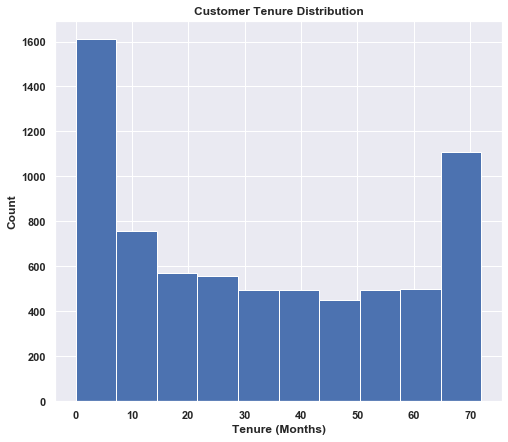

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure, dtype: float64


In [381]:
### Tenure ###
plt.hist(telco['Tenure'])
plt.ylabel('Count')
plt.xlabel('Tenure (Months)')
plt.title('Customer Tenure Distribution', fontweight='bold')
plt.show()
print(telco['Tenure'].describe())

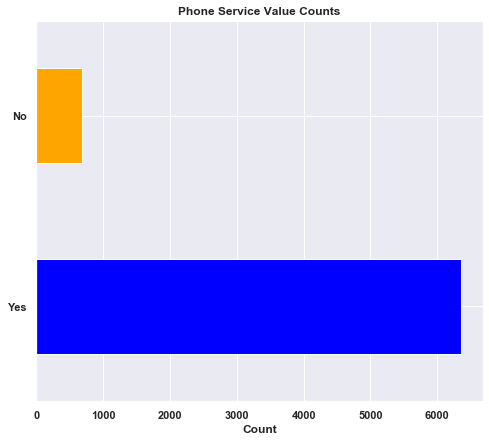

Yes    6361
No      682
Name: PhoneService, dtype: int64


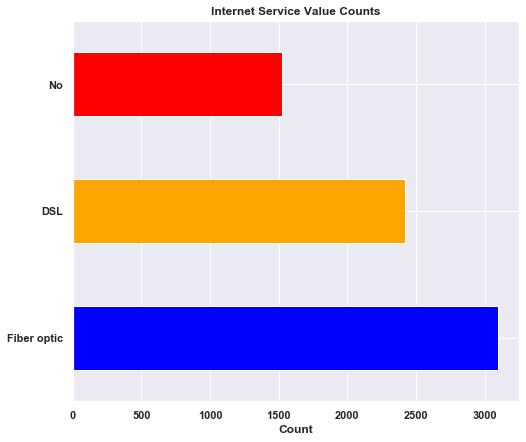

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

***SUMMARY***

Total number of customers:  7043
Number of customers who just have phone service:  1526
Number of customers who just have internet service:  682
Number of customers who have both services:  4835


In [382]:
### Service (Phone and/or Internet) ###
my_colors = ['blue', 'orange', 'red', 'green']

telco['PhoneService'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Phone Service Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['PhoneService'].value_counts())

telco['InternetService'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Internet Service Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['InternetService'].value_counts())

print('\n***SUMMARY***')
print('\nTotal number of customers: ', len(telco))
print('Number of customers who just have phone service: ', len(telco.loc[(telco['PhoneService'] == 'Yes') & (telco['InternetService'] == 'No')]))
print('Number of customers who just have internet service: ', len(telco.loc[(telco['PhoneService'] == 'No') & (telco['InternetService'] != 'No')]))
print('Number of customers who have both services: ', len(telco.loc[(telco['PhoneService'] == 'Yes') & (telco['InternetService'] != 'No')]))


Number of Customers With Phone Service:  6361


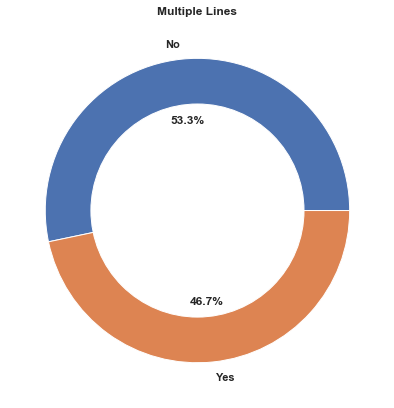

In [383]:
### Those that have Phone Service - Multiple Lines ###
print('\nNumber of Customers With Phone Service: ', len(telco.loc[telco['PhoneService'] == 'Yes']))
size = list(telco.loc[telco['PhoneService'] == 'Yes']['MultipleLines'].value_counts(normalize=True).values * 100)
labels = ['No', 'Yes']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Multiple Lines', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Number of Customers With Internet Service:  5517


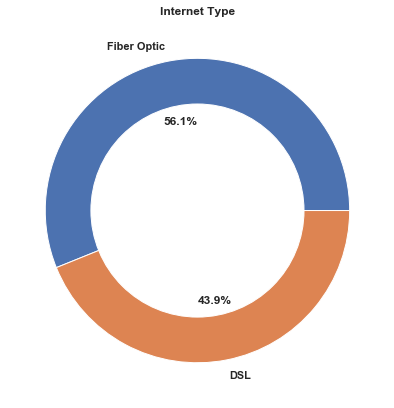


***SUMMARY OF INTERNET OPTIONS/ADD-ONS***

OnlineSecurity (%)
No     0.63404
Yes    0.36596
Name: OnlineSecurity, dtype: float64

OnlineBackup (%)
No     0.559724
Yes    0.440276
Name: OnlineBackup, dtype: float64

DeviceProtection (%)
No     0.560993
Yes    0.439007
Name: DeviceProtection, dtype: float64

TechSupport (%)
No     0.629509
Yes    0.370491
Name: TechSupport, dtype: float64

StreamingTV (%)
No     0.509335
Yes    0.490665
Name: StreamingTV, dtype: float64

StreamingMovies (%)
No     0.504803
Yes    0.495197
Name: StreamingMovies, dtype: float64


In [384]:
### Those that have Internet Service - OnlineSecurity, OnlineBackup, 
# DeviceProtection, TechSupport, StreamingTV, StreamingMovies ###

internet = telco.loc[telco['InternetService'] != 'No']
print('\nNumber of Customers With Internet Service: ', len(internet))
size = list(internet['InternetService'].value_counts(normalize=True).values * 100)
labels = ['Fiber Optic', 'DSL']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Internet Type', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
print('\n***SUMMARY OF INTERNET OPTIONS/ADD-ONS***')
for col in columns:
    print('\n' + col, '(%)')
    print(internet[col].value_counts(normalize=True))

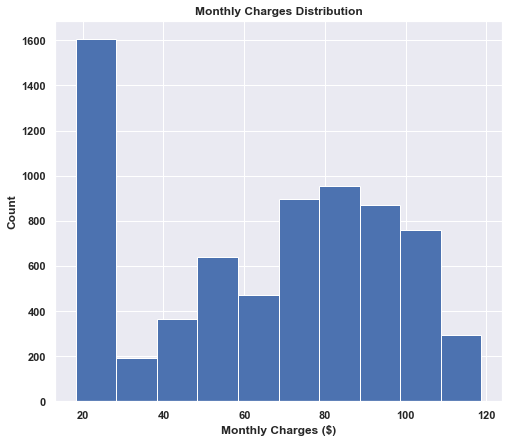

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [385]:
### Monthly Charges ###
plt.hist(telco['MonthlyCharges'])
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')
plt.title('Monthly Charges Distribution', fontweight='bold')
plt.show()
print(telco['MonthlyCharges'].describe())

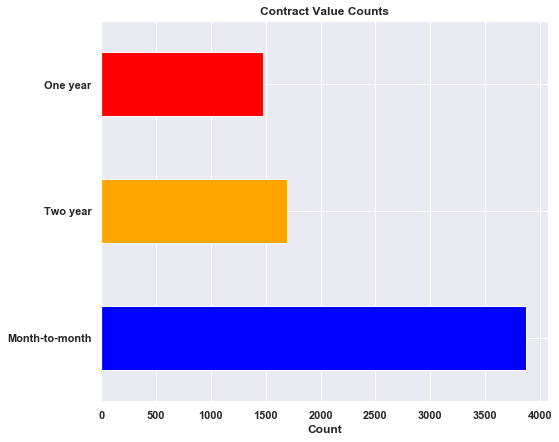

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Avg. Monthly payment by contract type

 Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


In [386]:
### Contract Type ###
telco['Contract'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Contract Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['Contract'].value_counts())

### Average Monthly Payment by Contract Type ###
print('\nAvg. Monthly payment by contract type')
print('\n', telco.groupby('Contract')['MonthlyCharges'].mean())

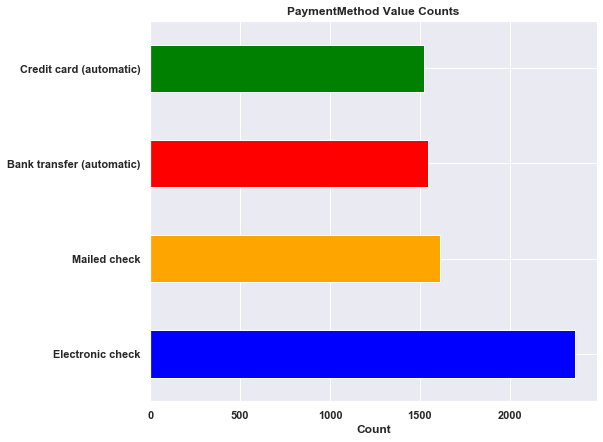

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [387]:
### Payment Methods ###
telco['PaymentMethod'].value_counts().plot(kind='barh', color=my_colors)
plt.title('PaymentMethod Value Counts', fontweight='bold')
plt.xlabel('Count')
plt.show()
print(telco['PaymentMethod'].value_counts())

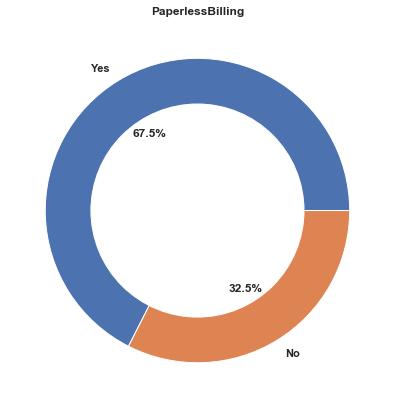

In [388]:
### Paperless Billing ###

size = list(internet['PaperlessBilling'].value_counts(normalize=True).values * 100)
labels = ['Yes', 'No']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('PaperlessBilling', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [389]:
### Adding service summary column for Tableau dashboard plans ###
telco['Service_Plan'] = ''
for idx, row in telco.iterrows():
    if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No':
        telco.loc[idx, 'Service_Plan'] = 'Phone & Internet'
    elif row['PhoneService'] == 'No' and row['InternetService'] != 'No':
        telco.loc[idx, 'Service_Plan'] = 'Internet'
    else:
        telco.loc[idx, 'Service_Plan'] = 'Phone'
print(telco.Service_Plan.value_counts())
telco.to_csv('Telco_Tab.csv', index=False)

Phone & Internet    4835
Phone               1526
Internet             682
Name: Service_Plan, dtype: int64


**LINK TO TABLEAU DASHBOARD (Analyzing Feature Effect on Churn):**
-------

**https://public.tableau.com/profile/rachid.rezzik#!/vizhome/TelcoCustomerChurn_15895649052840/Dashboard1?publish=yes**

**Analyzing Feature Effect on Churn Rate Using Pandas**

In [390]:
### Assigning numerical values to "yes"/"no" features to later analyze Churn Rates ###
key = {'Yes': 1, 'No': 0}
telco['Churn'] = telco['Churn'].map(key)

[Customer Demographics]
--------------

In [391]:
### Gender ###
print(telco.groupby('Gender').agg({'Churn' : [np.mean, 'count']}))

           Churn      
            mean count
Gender                
Female  0.269209  3488
Male    0.261603  3555


In [392]:
### Has Partner ###
print(telco.groupby('Partner').agg({'Churn' : [np.mean, 'count']}))

            Churn      
             mean count
Partner                
No       0.329580  3641
Yes      0.196649  3402


In [393]:
### Has Dependents ###
print(telco.groupby('Dependents').agg({'Churn' : [np.mean, 'count']}))

               Churn      
                mean count
Dependents                
No          0.312791  4933
Yes         0.154502  2110


In [394]:
### SeniorCitizen ###
print(telco.groupby('SeniorCitizen').agg({'Churn' : [np.mean, 'count']}))

                  Churn      
                   mean count
SeniorCitizen                
No             0.236062  5901
Yes            0.416813  1142


[Service Provided]
-------------------------------

In [395]:
### Service Plan ###
print(telco.groupby('Service_Plan').agg({'Churn' : [np.mean, 'count']}))
print('\n***COMMENTS: Customers who signed up for both internet and phone service churned at the highest rate')

                     Churn      
                      mean count
Service_Plan                    
Internet          0.249267   682
Phone             0.074050  1526
Phone & Internet  0.328025  4835

***COMMENTS: Customers who signed up for both internet and phone service churned at the highest rate


In [396]:
### Phone Service - Multiple Lines ###
print(pd.DataFrame(telco.groupby(['MultipleLines', 'Service_Plan']).agg({'Churn' : [np.mean, 'count']})).drop('No phone service', axis=0))

                                   Churn      
                                    mean count
MultipleLines Service_Plan                    
No            Phone             0.086993  1184
              Phone & Internet  0.338169  2206
Yes           Phone             0.029240   342
              Phone & Internet  0.319513  2629


In [397]:
### InternetService Provided ###
print(pd.DataFrame(telco.groupby('InternetService').agg({'Churn' : [np.mean,'count']})).drop('No', axis=0))
print('\n***COMMENTS***: Selecting Fiber Optic internet more than doubles the churn rate compared to DSL')

                    Churn      
                     mean count
InternetService                
DSL              0.189591  2421
Fiber optic      0.418928  3096

***COMMENTS***: Selecting Fiber Optic internet more than doubles the churn rate compared to DSL


In [398]:
### Internet Service - All Options ###
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in columns:
    print('\n', pd.DataFrame(telco.groupby([col, 'InternetService']).agg({'Churn' : [np.mean, 'count']})).drop('No internet service', axis=0))
print('\n***COMMENTS***: (Not adding on) - Online Security or Tech Support resulted in higher churn rate. (Adding on) - TV or Movie Streaming contained the highest churn rate')


                                    Churn      
                                    mean count
OnlineSecurity InternetService                
No             DSL              0.279613  1241
               Fiber optic      0.493576  2257
Yes            DSL              0.094915  1180
               Fiber optic      0.218117   839

                                  Churn      
                                  mean count
OnlineBackup InternetService                
No           DSL              0.256929  1335
             Fiber optic      0.507701  1753
Yes          DSL              0.106814  1086
             Fiber optic      0.303053  1343

                                      Churn      
                                      mean count
DeviceProtection InternetService                
No               DSL              0.252212  1356
                 Fiber optic      0.499712  1739
Yes              DSL              0.109859  1065
                 Fiber optic      0.315402  1357

      

[Account Information (Tenure/Payments/Contracts)]
-----

In [399]:
### Tenure ###

bins = [-1, 2, 16, 30, 44, 58, 73]
names = ['0-2', '2-16', '16-30', '30-44', '44-58', '58-73']
telco['Tenure_Group(Months)'] = pd.cut(telco['Tenure'], bins, labels=names)
churn = telco.groupby('Tenure_Group(Months)').agg({'Churn': [np.mean, 'count']})
print(churn)
print('\n***COMMENTS***: Tenure contains a negative correlation with Churn Rate.')

                         Churn      
                          mean count
Tenure_Group(Months)                
0-2                   0.583527   862
2-16                  0.391588  1688
16-30                 0.239230  1091
30-44                 0.212054   896
44-58                 0.152648   963
58-73                 0.069345  1543

***COMMENTS***: Tenure contains a negative correlation with Churn Rate.


In [400]:
### Payment Info ###
columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for col in columns: 
    print('\n', telco.groupby([col]).agg({'Churn' : [np.mean, 'count']}))
print('\n***COMMENTS***: Customers who choose the month-to-month contract option and to pay with an electronic ckeck contain a significantly higher churn rate.  ')


                    Churn      
                    mean count
Contract                      
Month-to-month  0.427097  3875
One year        0.112695  1473
Two year        0.028319  1695

                      Churn      
                      mean count
PaperlessBilling                
No                0.163301  2872
Yes               0.335651  4171

                               Churn      
                               mean count
PaymentMethod                            
Bank transfer (automatic)  0.167098  1544
Credit card (automatic)    0.152431  1522
Electronic check           0.452854  2365
Mailed check               0.191067  1612

***COMMENTS***: Customers who choose the month-to-month contract option and to pay with an electronic ckeck contain a significantly higher churn rate.  


In [401]:
### Monthly Charge Amount ###
bins = [15, 36, 57, 78, 99, 120]
names = ['18-36', '36-57', '57-78', '78-99', '99-119']
telco['MonthlyCharges_Group($)'] = pd.cut(telco['MonthlyCharges'], bins, labels=names)
churn = telco.groupby('MonthlyCharges_Group($)').agg({'Churn': [np.mean, 'count']})
print(churn)
month = telco.loc[(telco['MonthlyCharges'] > 78) & (telco['MonthlyCharges'] <= 99)]
print('\n***COMMENTS***: Churn tends to increase with increasing monthly charges. A spike in churn occurs for those who pay $78 - $99 per month, these customers all have both internet and phone service.')
print('\nService Plan Value Counts for Customers Who Pay $78 - $99 per Month', '\n', month['Service_Plan'].value_counts())


                            Churn      
                             mean count
MonthlyCharges_Group($)                
18-36                    0.112731  1783
36-57                    0.273917   993
57-78                    0.289280  1362
78-99                    0.369450  1892
99-119                   0.299112  1013

***COMMENTS***: Churn tends to increase with increasing monthly charges. A spike in churn occurs for those who pay $78 - $99 per month, these customers all have both internet and phone service.

Service Plan Value Counts for Customers Who Pay $78 - $99 per Month 
 Phone & Internet    1892
Name: Service_Plan, dtype: int64


**Part II: Machine Learning**

In [402]:
### Data Preprocessing - Numerically Encoding 'Yes/No' Columns ###
num_key = {'Yes': 1, 'No': 0}
columns = ['SeniorCitizen', 'PaperlessBilling', 'PhoneService', 'Dependents', 'Partner']
for col in columns:
    telco[col] = telco[col].map(num_key)
    
### Dropping Groups used in Data Analysis ###
telco = telco.drop(['Tenure_Group(Months)', 'MonthlyCharges_Group($)'], axis=1)

In [403]:
### Numerically Encoding Categorical Features ###
telco_ml = pd.get_dummies(data=telco, columns=['Gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                                              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                                              'StreamingMovies', 'Contract', 'PaymentMethod', 'Service_Plan'], drop_first=False)

In [404]:
### Scaling Data for Logistic Regression ###
from sklearn.preprocessing import MinMaxScaler

X = telco_ml.drop('Churn', axis=1)
y = telco_ml['Churn']
features = X.columns

scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

Churn - Training Set
0    4139
1    1495
Name: Churn, dtype: int64


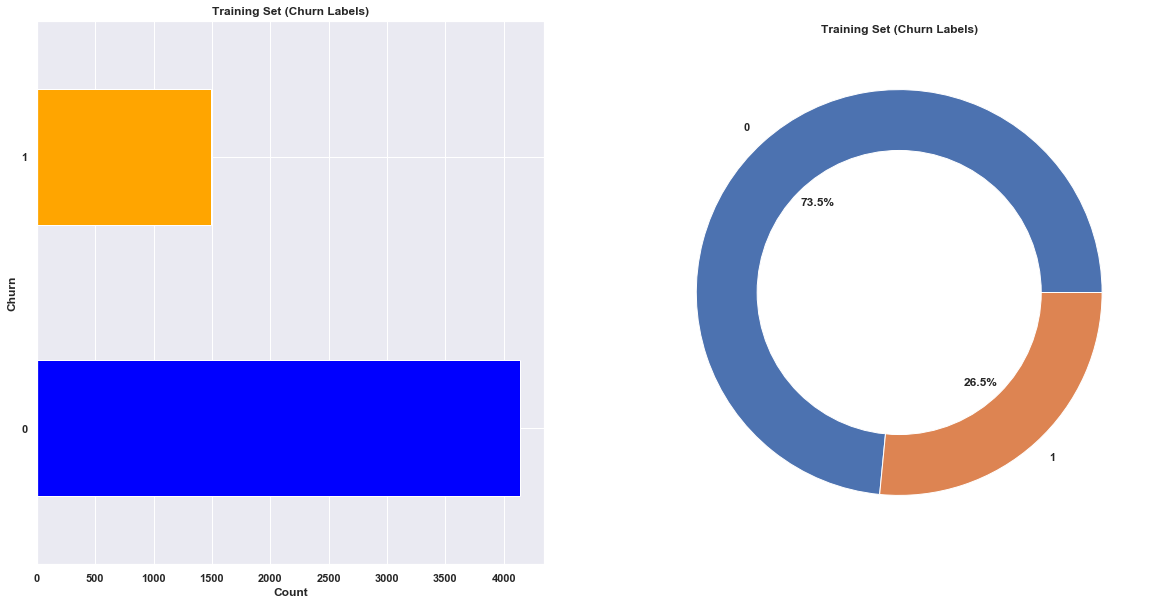

In [411]:
### Creating Train and Test Sets ###
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=y)
new = pd.DataFrame(y_train)
new.columns = ['Churn']
print('Churn - Training Set')
print(new['Churn'].value_counts())

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
new['Churn'].value_counts().plot(kind='barh', color=my_colors)
plt.title('Training Set (Churn Labels)', fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Churn')
plt.subplot(1,2,2)
size = list(new['Churn'].value_counts(normalize=True).values * 100)
labels = ['0', '1']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Training Set (Churn Labels)', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [412]:
### Logistic Regression ###
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
print('\nTesting Accuracy:', lr.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)



Testing Accuracy: 0.8019872249822569
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

[[922 113]
 [166 208]]

ROC_AUC:  0.7234854943294842


In [416]:
### SVM ###
from sklearn.svm import SVC

params = {'C' : [.01, .1, 1, 10, 100]}
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
svm = grid_search.best_estimator_
y_pred_test = svm.predict(X_test)
print('\nTesting Accuracy:', svm.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)


{'C': 0.1}

Testing Accuracy: 0.8048261178140526
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409

[[925 110]
 [165 209]]

ROC_AUC:  0.7262716680875249


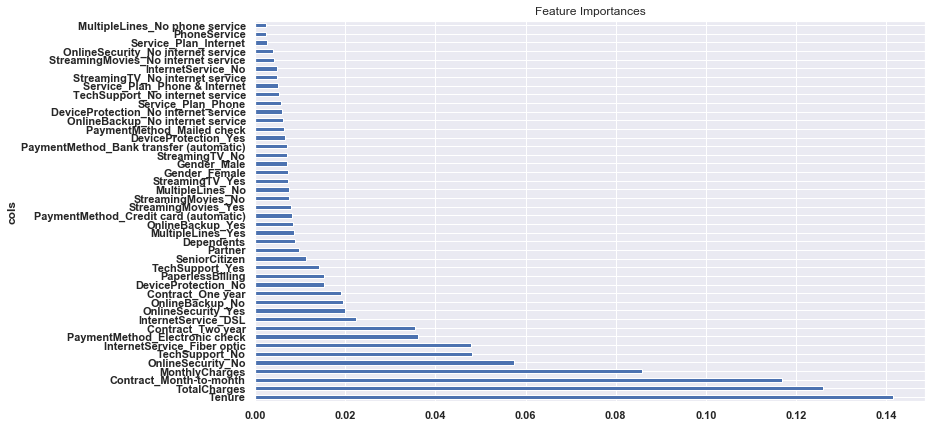


OOB Score:  0.8044018459353922

Best Params: {'n_estimators': 600, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Training F1_Macro: 0.7166007454735868
Training Accuracy: 0.7984228409148537

Testing Accuracy: 0.8048261178140526
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

[[942  93]
 [182 192]]

ROC_AUC:  0.7117569557467256


In [413]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)

def plot_fi(fi): 
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

scoring = ['accuracy','f1_macro']

clf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=27)
rand_search = RandomizedSearchCV(clf, 
                           param_distributions={
                                       "n_estimators": [200, 400, 600, 800],
                                       "max_depth": [5, 10, 15],
                                       "min_samples_leaf": [10, 5, 3, 2, 1],
                                       "min_samples_split": [2, 5, 10, 15, 20],
                                       "max_features": ['sqrt', 'log2', .5, None]
                                       },
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter = 35)
rand_search.fit(X_train, y_train)
best_clf = rand_search.best_estimator_
y_pred_test = best_clf.predict(X_test)
fi = rf_feat_importance(best_clf, telco_ml.drop('Churn', axis=1))
plot_fi(fi)
plt.title('Feature Importances')
plt.show()

print('\nOOB Score: ', best_clf.oob_score_)
print('\nBest Params:', rand_search.best_params_)
print('Training F1_Macro:', np.mean(rand_search.cv_results_['mean_test_f1_macro']))
print('Training Accuracy:', np.mean(rand_search.cv_results_['mean_test_accuracy']))
print('\nTesting Accuracy:', best_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)

In [450]:
### XGBoost ###
from xgboost import XGBClassifier

params = {'n_estimators': [3000, 3250]}
xgb = XGBClassifier(objective='binary:logistic', nthread=4, learning_rate=.0025, 
                    subsample=.7, colsample_bytree=.9, min_child_weight=5, max_depth=3, gamma=0, random_state=27)
rand_search = RandomizedSearchCV(xgb, 
                           param_distributions=params,
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter=3, 
                           iid=False)
rand_search.fit(X_train, y_train)
xgb = rand_search.best_estimator_
y_pred_test = xgb.predict(X_test)
print('\nTesting Accuracy:', xgb.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)


Testing Accuracy: 0.8097941802696949
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.68      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409

[[944  91]
 [177 197]]

ROC_AUC:  0.7194076313002145


0    2718
1    1495
dtype: int64


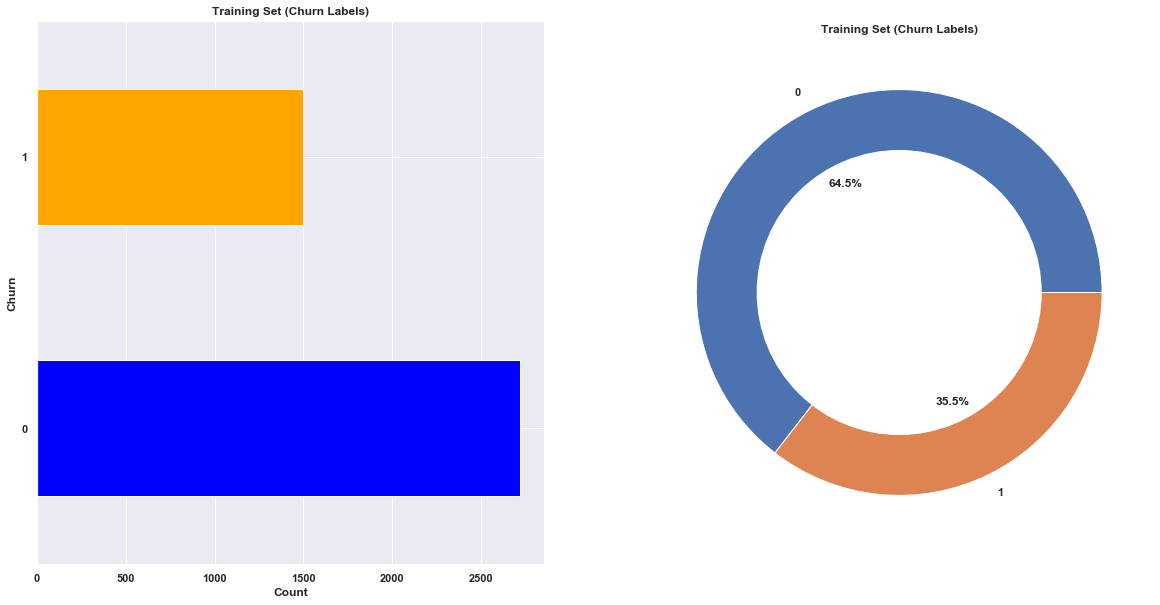

In [498]:
### Undersampling the Majority Class ###
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy=.55, random_state=0)
X_resampled, y_resampled = under.fit_resample(X_train, y_train)
hybrid = pd.Series(y_resampled)
print(hybrid.value_counts())
plt.subplot(1,2,1)
hybrid.value_counts().reset_index(drop=True).plot(kind='barh', color=my_colors)
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title('Training Set (Churn Labels)', fontweight='bold')
plt.subplot(1,2,2)
size = list(hybrid.value_counts(normalize=True).values * 100)
labels = ['0', '1']
plt.pie(size, labels=labels, autopct='%1.1f%%')
plt.title('Training Set (Churn Labels)', fontweight='bold')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [485]:
### Logistic Regression ###

lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)
y_pred_test = lr.predict(X_test)
print('\nTesting Accuracy:', lr.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)


Testing Accuracy: 0.794180269694819
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1035
           1       0.60      0.67      0.63       374

    accuracy                           0.79      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.79      0.80      1409

[[868 167]
 [123 251]]

ROC_AUC:  0.7548851688237878


In [484]:
params = {'C' : [.01, .1, 1, 10, 100]}
svm = SVC(kernel='linear')
grid_search = GridSearchCV(svm, param_grid=params, cv=5)
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)
svm = grid_search.best_estimator_
y_pred_test = svm.predict(X_test)
print('\nTesting Accuracy:', svm.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)

{'C': 10}

Testing Accuracy: 0.7913413768630234
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1035
           1       0.60      0.66      0.63       374

    accuracy                           0.79      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.79      0.79      1409

[[869 166]
 [128 246]]

ROC_AUC:  0.7486837686326177


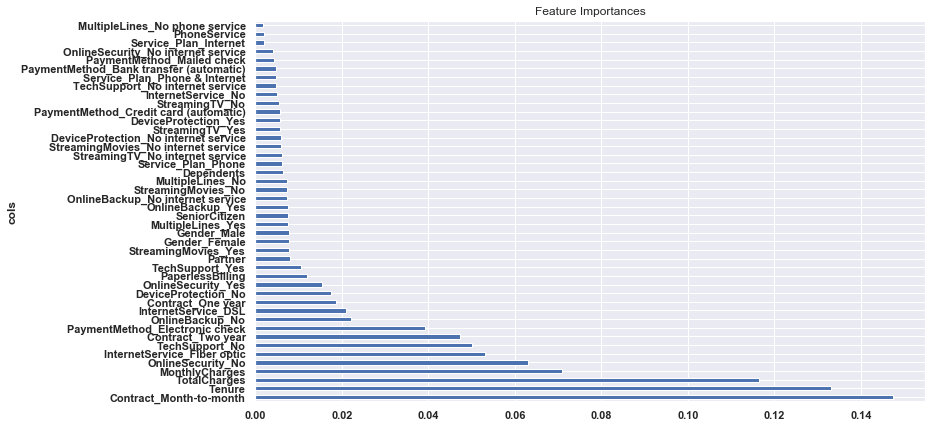


OOB Score:  0.7728459530026109

Best Params: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 20}
Training F1_Macro: 0.7441261544847745
Training Accuracy: 0.7697534841137973

Testing Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1035
           1       0.62      0.63      0.62       374

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409

[[889 146]
 [138 236]]

ROC_AUC:  0.7449766204241907


In [483]:
### RandomForestClassifier ###

clf = RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=27)
rand_search = RandomizedSearchCV(clf, 
                           param_distributions={
                                       "n_estimators": [200, 400, 600, 800],
                                       "max_depth": [5, 10, 15, 20],
                                       "min_samples_leaf": [10, 5, 3, 2, 1],
                                       "min_samples_split": [2, 5, 10, 15, 20],
                                       "max_features": ['sqrt', 'log2', .3, .5, None]
                                       },
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter = 35)
rand_search.fit(X_resampled, y_resampled)
best_clf = rand_search.best_estimator_
y_pred_test = best_clf.predict(X_test)
fi = rf_feat_importance(best_clf, telco_ml.drop('Churn', axis=1))
plot_fi(fi)
plt.title('Feature Importances')
plt.show()

print('\nOOB Score: ', best_clf.oob_score_)
print('\nBest Params:', rand_search.best_params_)
print('Training F1_Macro:', np.mean(rand_search.cv_results_['mean_test_f1_macro']))
print('Training Accuracy:', np.mean(rand_search.cv_results_['mean_test_accuracy']))
print('\nTesting Accuracy:', best_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)

In [531]:
X_resampled.columns = X_test.columns

In [530]:
### XGB ###

params = {'subsample':[.8, .7]}
xgb = XGBClassifier(objective='binary:logistic', nthread=4, n_estimators=2250, learning_rate=.0025, 
                    subsample=.8, colsample_bytree=.6, max_depth=3, min_child_weight=5, gamma=0, random_state=27)
rand_search = RandomizedSearchCV(xgb, 
                           param_distributions=params,
                           n_jobs=-1, scoring=scoring, refit='f1_macro',
                           cv=5, n_iter=3,
                           iid=False)
rand_search.fit(X_resampled, y_resampled)
xgb = rand_search.best_estimator_
y_pred_test = xgb.predict(X_test)
print('\nTesting Accuracy:', xgb.score(X_test, y_test))
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nROC_AUC: ', roc_auc)



Testing Accuracy: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1035
           1       0.62      0.67      0.64       374

    accuracy                           0.80      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.81      0.80      0.81      1409

[[882 153]
 [124 250]]

ROC_AUC:  0.7603115554522204
